# Week 6

Ray Hu & Xietao Wang Lin

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.stats import maxwell
import pandas as pd
%matplotlib inline
pd.set_option('expand_frame_repr', False)

Parameters

In [2]:
gridPoints = 10

In [3]:
rods = np.loadtxt('rods.dat')
motors = np.loadtxt('motors.dat')
length = np.loadtxt('length_final.dat')
allLengths = np.loadtxt('length_all.dat')

numberOfRods = rods[:, 0].size

def gaussian(x, mu, sigma):
    return 1/((2*math.pi*(sigma**2))**(1/2)) * np.exp((-(x-mu)**2)/(2*(sigma**2)))


In [4]:
def calculateMotorPositions(RodsMatrix, MotorMatrix, numberOfMotors):

    motorPositions = np.zeros(numberOfMotors)
    position = RodsMatrix[0, 0] + MotorMatrix[0, 0]
    motorPositions[0] = position
    for motor in range(1, numberOfMotors):
        position = (RodsMatrix[motor, 0] + MotorMatrix[motor, 0])
        motorPositions[motor] = position
    
    return motorPositions

def plotSystem(RodsMatrix, MotorsMatrix, numberOfRods, gridPoints):

    motorPos = calculateMotorPositions(RodsMatrix, MotorsMatrix, numberOfRods)
    for row in range(0, numberOfRods):
        'Rods'
        y_r = np.ones(gridPoints)*row*0.2
        x_r = np.linspace(RodsMatrix[row, 0], RodsMatrix[row, 0] + RodsMatrix[row, 1], gridPoints, endpoint=True)
        
        plt.plot(x_r, y_r)
        'Motors'
        y_m = row*0.2 + 0.1
        x_m = motorPos[row]
        plt.scatter(x_m, y_m)

    plt.xlabel('x coordinate, motors in dots')
    plt.ylabel('Rods, rod 1 is y = 0, next rod is y += 0.2')
    plt.title('1D System')
    plt.show()

def plotMotorPositions(rods, motors, numberOfRods):

    motorsPos = calculateMotorPositions(rods, motors, numberOfRods)
    plt.hist(motorsPos, 20)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of motors')
    plt.title('Motor distribution')
    plt.show()

def rodMidPointPositions(rods, numberOfRods):

    midPoints = np.zeros(numberOfRods)
    for point in range(0, numberOfRods):
        midPoints[point] = rods[point, 0] + rods[point, 1]*0.5
    plt.hist(midPoints, 10)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of rod-midpoints')
    plt.title('Rod distribution')
    plt.show()

def bothPositions(rods, motors, numberOfRods):

    midPoints = np.zeros(numberOfRods)
    for point in range(0, numberOfRods):
        midPoints[point] = rods[point, 0] + rods[point, 1]*0.5
    motorsPos = calculateMotorPositions(rods, motors, numberOfRods)
    plt.hist(motorsPos, 10)
    plt.hist(midPoints, 10)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of rod-midpoints/motors')
    plt.title('Rod/motor distribution')
    plt.show()

def averageLengthEvolution(allLengths):
    means = np.zeros(allLengths[0, :].size)
    for tstep in range(0, allLengths[0, :].size):
        mean = np.mean(allLengths[:, tstep])
        means[tstep] = mean
    
    plt.plot(np.linspace(0, means.size, means.size), (means))
    plt.xlabel('Time step')
    plt.ylabel('Average length')
    plt.title('Average length, 2000 simulations, v_d = v_p = 0.01')
    #plt.plot(np.linspace(0, means.size-150, means.size-150), means[:50])
    plt.show()
    
    

def motorRelativePositions(motors):
    plt.hist(motors[:, 0], 10000, (0,1), density=True)
    plt.show()
    

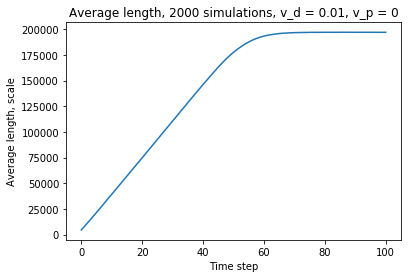

In [5]:

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean
    
plt.plot(np.linspace(0, means.size, means.size), (means))
plt.xlabel('Time step')
plt.ylabel('Average length, scale')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0')
#plt.plot(np.linspace(1, means.size-150, means.size-150), np.log(means[:50]))
plt.show()

<IPython.core.display.Javascript object>


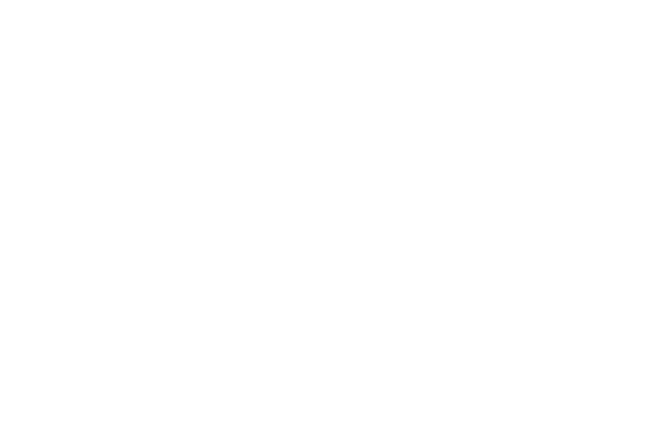

<IPython.core.display.Javascript object>


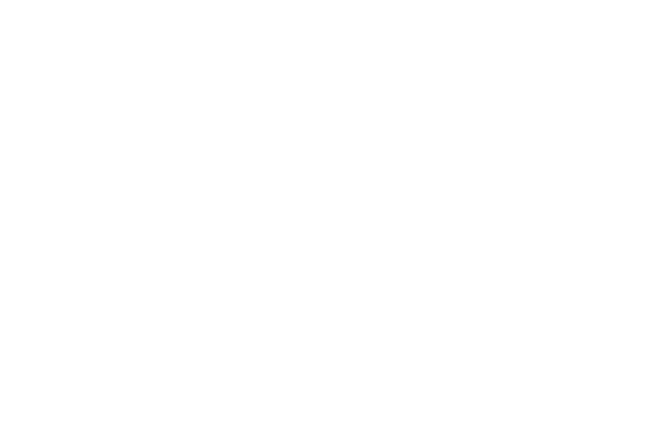

In [20]:
def line(x, a, b):
    return a*x + b

def quadratic(x, a, b, c):
    return a*np.exp(x) + b*x + c

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

#x = np.log(np.linspace(0, means.size-185, means.size-185))
#y = np.log(means[0:15])
plt.plot(np.log(np.linspace(1, means.size, means.size)), np.log(means))
plt.xlabel('Time step, log scale')
plt.ylabel('Average length, log scale')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0.0001')
plt.show()
#plt.scatter(x, y)


In [7]:

popt, pcov = curve_fit(quadratic, x, y)
print(f'optimal = {popt}')
a_1, b_1, c_1 = popt
cov_1 = pcov
plt.plot(x, quadratic(x, a_1, b_1, c_1))
print(f'sqrt of cov = {np.sqrt(np.diag(pcov))}')


popt, pcov = curve_fit(line, x, y)
print(f'optimal, line = {popt}')
a_2, b_2 = popt
plt.plot(x, line(x, a_2, b_2))
print(f'sqrt of cov, line = {np.sqrt(np.diag(pcov))}')
plt.show()

plt.scatter(x, np.subtract(quadratic(x, a_1, b_1, c_1), y))
plt.scatter(x, np.subtract(line(x, a_2, b_2), y))
plt.show()

plt.imshow(np.abs(cov_1))
plt.colorbar()
plt.show()


NameError: name 'x' is not defined

In [ ]:
plotSystem(rods, motors, numberOfRods, gridPoints)

In [ ]:
plotMotorPositions(rods, motors, numberOfRods)

In [ ]:
rodMidPointPositions(rods, numberOfRods)

In [ ]:
bothPositions(rods, motors, numberOfRods)

In [ ]:
def lengthDistribution(lengths):

    plt.hist(lengths, 40, density=True)
    plt.xlabel('Length')
    plt.ylabel('Number')
    plt.title('Length distribution')
    params = maxwell.fit(lengths)
    x = np.linspace(1.5, 10, 100)
    plt.plot(x, maxwell.pdf(x, *params))
    plt.show()

lengthDistribution(length)


In [ ]:
means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

#print(a,b)
def power_t(x, a, b):
    return np.exp(b)*np.power(x, a)
x = np.linspace(1, means.size-185, means.size-185)
plt.plot(np.linspace(0, means.size, means.size), (means))
plt.xlabel('Time step')
plt.ylabel('Average length')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0.0001')
#plt.scatter(x, means[:15])
#plt.plot(x, power_t(x, a, b))

plt.show()
#plt.scatter(x, np.subtract(power_t(x, a,b), means[:15]))

In [ ]:
def exp(x, c):
    return np.exp(-c*x)

def line(x, a, b):
    return a*(x-1) + b

motors = np.loadtxt('motors.dat')
plt.hist(motors[:, 0], 30, (0,1), density=True)
#plt.show()

x = np.linspace(0, 1, 100)
#plt.plot(x, exp(x, c))


plt.show()
plt.hist(motors[:, 0], 30, (0.9,1))
print(np.extract(motors[:, 0] <= 0.999, motors).size)

In [ ]:
c = 6
def exp(x, a, b):
    return b*np.exp(a*x)
motors_a = np.loadtxt('motors.dat')
#plt.hist(motors_a[:, 0], 100, (0.7,1), density=True)
#plt.show()

x = np.linspace(0, 1, 100)
#plt.plot(x, exp(x, c))

bin_heights, bin_borders, _ = plt.hist(motors_a[:, 0], bins=10, label='histogram', density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, pcov = curve_fit(exp, bin_centers, bin_heights)
a, b = popt
print(f'Best fit: {popt}')
plt.plot(x, exp(x, a, b))
print(f'Covariance: {pcov}')
plt.title('v_p = v_d/180')
plt.xlabel('[0,1]')
plt.ylabel('Frequency')


plt.show()
plt.hist(motors_a[:, 0], 30, (0.9,1), density=True)
print(np.extract(motors_a[:, 0] <= 0.57, motors_a).size)

In [ ]:
def calculateError(allLength):
    errors = np.zeros(allLength[0, :].size)
    for tstep in range(0, allLength[0, :].size):
        error = np.std(allLength[:, tstep])
        errors[tstep] = error
    return errors

error = calculateError(allLengths)/2000

plt.plot((np.linspace(0, error.size, error.size)), (error))
plt.title('std/time graph, log scale')
plt.ylabel('std')
plt.xlabel('time step, log scale')
plt.show()

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

plt.errorbar((np.linspace(1, means.size, means.size)), (means), yerr=error, fmt='o')
plt.xlabel('Time step, log scale')
plt.ylabel('Average length, log scale')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0.0001')
plt.show()



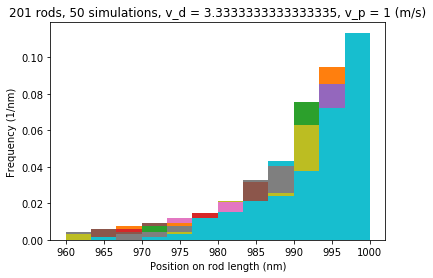

[0.00122701 0.00143503 0.00188072 0.0021918  0.00229785 0.00290733
 0.00374492 0.00550211 0.00505421 0.00844201 0.00966416 0.00959811]


0.3

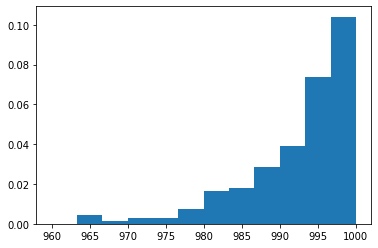

In [49]:
def exp(x, a, b):
    return b*np.exp(a*x)

def lineal(x, a, b):
    return a*(x-1000) + b
motors_all = np.loadtxt('motors_multiple.dat')

v_d = 10/3
v_p = 1

bins = 12
start_point = 960

simuls = motors_all[:, 0].size
x = np.linspace(start_point, 1000, bins)
bins_vals = np.zeros((simuls, bins))
y = np.zeros(bins)
y_error = np.zeros(bins)
for i in range(simuls):
    bins_vals[i], bin_borders, _ = plt.hist(motors_all[i], bins, (start_point, 1000), density=True)
    
plt.title(f'201 rods, 50 simulations, v_d = {v_d}, v_p = {v_p} (m/s)')
plt.xlabel('Position on rod length (nm)')
plt.ylabel('Frequency (1/nm)')

for n in range(bins):
    y[n] = np.mean(bins_vals[:, n])
    y_error[n] = np.std(bins_vals[:, n])

plt.show()


print(y_error)

vals, _, _ = plt.hist(motors_all[1], bins, (start_point, 1000), density=True)
np.sum(vals)

c(L) = 0.09526988580344303
B exp(A(x-L)) |     A        |        B          |      L = 1000 nm
Best fit: [0.1138255684870804, 0.1019393824794932]
Error +-: [0.0031248054597293887, 0.0031268775925736357]
          0
0  1.000000
1  3.333333
2  0.090000
3  0.113826
4  0.101939
5  0.003125
6  0.003127
7  0.095270


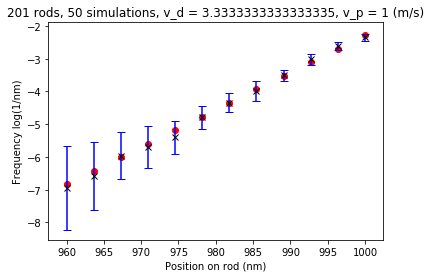

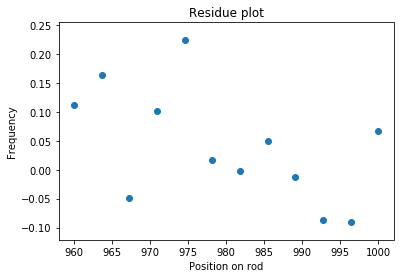

In [18]:
plt.errorbar(x, np.log(y), zorder=10000, yerr=np.divide(y_error,y), color='black', fmt='x', ecolor='blue', capsize=4)
#plt.scatter(x, y, zorder=9999)



epsilon = v_p/(v_d*v_d)
popt, pcov = curve_fit(lineal, x, np.log(y), sigma=np.divide(y_error,y))
a, b = popt
a_e, b_e = np.sqrt(np.diag(pcov))
b_e = np.exp(b)*b_e
print(f'c(L) = {y[-1]}')
print('B exp(A(x-L)) |     A        |        B          |      L = 1000 nm')
print(f'Best fit: {[a, np.exp(b)]}')
print(f'Error +-: {[a_e, b_e]}')
plt.scatter(x, lineal(x, a, b), color='r')

result = [v_p, v_d, epsilon, a, np.exp(b), a_e, b_e, y[-1]]
r_df = pd.DataFrame(result)
r_df.to_clipboard(index=False, header=None)
print(r_df)
"""
theory = np.array([9.00, np.log(y[-1])-9])
plt.scatter(x, lineal(x, theory[0], theory[1]), color='green')
"""

"""
print(f'Theory  : {theory}')
"""
plt.title(f'201 rods, 50 simulations, v_d = {v_d}, v_p = {v_p} (m/s)')
plt.xlabel('Position on rod (nm)')
plt.ylabel('Frequency log(1/nm)')
plt.show()

plt.title('Residue plot')
plt.xlabel('Position on rod')
plt.ylabel('Frequency')
plt.scatter(x, lineal(x, a, b)-np.log(y))
plt.show()

                    1          2         3          4          5          6         7         8
0                                                                                              
v_p          1.000000   1.000000  1.000000   2.000000   4.000000   0.250000   9.00000  1.000000
v_d         10.000000  20.000000  5.000000  10.000000  10.000000  10.000000  10.00000  3.333333
epsilon      0.010000   0.002500  0.040000   0.020000   0.040000   0.002500   0.09000  0.090000
A            0.013500   0.003460  0.053000   0.026700   0.048300   0.003510   0.09000  0.114000
B            0.011700   0.003310  0.046300   0.023100   0.041900   0.003370   0.07910  0.102000
A_error      0.000125   0.000028  0.000890   0.000299   0.002310   0.000048   0.00397  0.003120
B_error      0.000105   0.000028  0.000791   0.000280   0.002050   0.000046   0.00341  0.003130
c(L)         0.011600   0.003320  0.044600   0.022600   0.038200   0.003390   0.07470  0.095300
l_tr              NaN        NaN       N

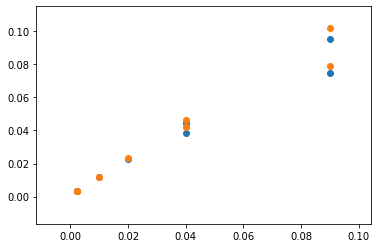

In [41]:
df = pd.read_csv('lineal_2.csv', header=None, index_col=0)

print(df)

arr = df.to_numpy()
x = arr[0]
y = arr[-3]
z = arr[4]
print(y)

plt.scatter(x, y)
plt.scatter(x, z)
plt.show()

In [ ]:
plt.errorbar(x, y, zorder=10000, yerr=y_error, color='black', fmt='x', ecolor='blue', capsize=4)

popt, pcov = curve_fit(exp, x, y, p0=[30, 0.000000001], maxfev=5000)
a, b = popt
print('B x exp(Ax) |     A      |    B')
print(f'Best fit: {popt}')
print(f'Error +-: {np.sqrt(np.diag(pcov))}')
plt.scatter(x, exp(x, a, b), color='r')
theory = np.array([9.0, y[-1]*np.exp(-9)])
plt.scatter(x, exp(x, theory[0], theory[1]), color='green')

print(f'Theory  : {theory}')
plt.title('201 rods, 50 simulations, v_d = 0.01, v_p = 0.002')
plt.xlabel('[0,1]')
plt.ylabel('Frequency')
plt.show()